## Symmetry-Adapted Perturbation Theory (SAPT)

SAPT é uma teoria de perturbação desenvolvida para especificamente calcular a energia de interação entre dois átomos ou moléculas não ligadas covalentemente. Ao contrário da abordagem supermolecular, SAPT obtem a energia de interação diretamente - não há necessidade de subtração de termos. Além disso, o resultado é obtido como uma soma de correções separadas para energia de interação: eletrostática, indução, dispersão e troca. A decomposição de energia SAPT facilita o entendimento e a interpretação física dos resultados.

- *Energia Eletrostática* surge da interação de natureza Coulombiana entre regiões de densidade de carga de moléculas isoladas.
- *Energia de Indução* é o efeito energético da polarização mútua entre as duas moléculas.
- *Energia de Dispersão* é uma consequência da correlação eletrônica intermolecular, geralmente explicada em termos de flutuação correlacionadas da densidade eletrônica de ambas moléculas.
- *Energia de Torca* é um efeito repulsivo de curto-alcançe que é consequência do princípio da Exclusão de Pauli. Químicos orgânicos se referem a este termo como repulsões estéricas.

Nesta atividade, iremos explorar o nível mais simples da Teoria SAPT chamada de SAPT0 (veja [Parker:2014] para as definições dos diferentes níveis do SAPT). Uma correção SAPT particular $E^{(nk)}$ corresponde aos efeitos que são da $n$-ésima ordem na interação intermolecular e $k$-ésima ordem na correlação eletrônica intramolecular. No SAPT0, correlação intermolecular é negligenciada e a interação intermolecular é incluída em termos de segunda ordem:

\begin{equation}
E_{\rm int}^{\rm SAPT0}=E^{(10)}_{\rm elst}+E^{(10)}_{\rm exch}+E^{(20)}_{\rm ind,resp}+E^{(20)}_{\rm exch-ind,resp}+E^{(20)}_{\rm disp}+E^{(20)}_{\rm exch-disp}+\delta E^{(2)}_{\rm HF}
\end{equation}

Nesta equação, as correções consecutivas contabilizam os efeitos eletrostáticos, troca de primeira ordem, indução, indução troca, dispersão e dispersão troca, respectivamente. O subscrito adicional ''resp'' denota que estas correções são computadas incluindo efeitos *resposta* - os orbitais moleculares HF de cada molécula são relaxados no campo elétrico gerado pela outra molécula. O último termo $\delta E^{(2)}_{\rm HF}$ aproxima efeitos de terceira- e ordens superiores da indução e é determinado de um cálculo HF supermolecular.

Continuando com nosso exemplo de dois átomos de Hélio, vamos agora calcular as contribuições para energia de interação SAPT0 usando o Psi4. Nos resultados que seguirão, iremos agrumar $E^{(20)}_{\rm ind,resp}$, $E^{(20)}_{\rm exch-ind,resp}$, e $\delta E^{(2)}_{\rm HF}$ para definir o efeito de indução total, e agrupar $E^{(20)}_{\rm disp}$ com $E^{(20)}_{\rm exch-disp}$ para definir o efeito de dispersão total.


In [1]:
import sys; sys.path.append("/usr/lib/x86_64-linux-gnu/") 
import time
import numpy as np
import scipy
from scipy.optimize import *
np.set_printoptions(precision=5, linewidth=200, threshold=2000, suppress=True)
import psi4
import matplotlib.pyplot as plt

# Set Psi4 & NumPy Memory Options
psi4.set_memory('1 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2

psi4.set_options({'basis': 'aug-cc-pVTZ',
              'e_convergence': 1e-10,
              'd_convergence': 1e-10,
              'INTS_TOLERANCE': 1e-15})


  Memory set to 953.674 MiB by Python driver.


Agora vamos definir as distâncias de interesse e as geometrias

In [2]:
distances = [4.0,4.5,5.0,5.3,5.6,6.0,6.5,7.0,8.0,9.0,10.0]
eelst = np.zeros((11))
eexch = np.zeros((11))
eind = np.zeros((11))
edisp = np.zeros((11))
esapt = np.zeros((11))

Agora vamos pedir para o Psi4 calcular as energias com o método SAPT0 com os átomos de Hélio estando separados entre $R=4$ Angstroms até $10$ Angstroms. Iremos também converter as energias de unidades atômicas *Hartree* para *kcal/mol*, em que $1E_h=627.509kcal\cdot mol^{-1}$.

In [3]:
for i in range(len(distances)):
  dimer = psi4.geometry("""
  He 0.0 0.0 0.0
  --
  He 0.0 0.0 """+str(distances[i])+"""
  units bohr
  symmetry c1
  """)

  psi4.energy('sapt0')
  eelst[i] = psi4.variable('SAPT ELST ENERGY') * 627.509
  eexch[i] = psi4.variable('SAPT EXCH ENERGY') * 627.509
  eind[i] = psi4.variable('SAPT IND ENERGY') * 627.509
  edisp[i] = psi4.variable('SAPT DISP ENERGY') * 627.509
  esapt[i] = psi4.variable('SAPT TOTAL ENERGY') * 627.509
  psi4.core.clean()


Por fim vamos lançar mão de um gráfico que represente a curva de energia potencial de interação do dímero de Hélio usando o Matplotlib

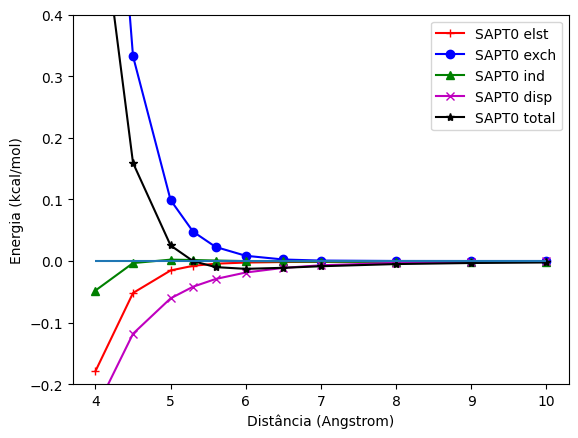

In [5]:
plt.close()
plt.ylim(-0.2,0.4)
plt.plot(distances,eelst,'r+',linestyle='-',label='SAPT0 elst')
plt.plot(distances,eexch,'bo',linestyle='-',label='SAPT0 exch')
plt.plot(distances,eind,'g^',linestyle='-',label='SAPT0 ind')
plt.plot(distances,edisp,'mx',linestyle='-',label='SAPT0 disp')
plt.plot(distances,esapt,'k*',linestyle='-',label='SAPT0 total')
plt.hlines(0.0,4.0,10.0)
plt.legend(loc='upper right')
plt.xlabel('Distância (Angstrom)')
plt.ylabel('Energia (kcal/mol)')
plt.show()

*Questionamentos* 
1. Qual é a origem da atração entre dois átomos de Hélio? Esta interação é a responsável por gases nobres poderem se condensar.
2. Para a interação entre dois átomos de Hélio, Quais termos SAPT são de *longo-alcance* (vão a zero com a distância como uma lei do inverso de uma potência $R$) e quais são de *curto-alcance* (vão a zero exponencialmente com $R$ assim como a superposição de orbitais moleculares)?


A energia de dispersão decai com $R$ grande como $R^{-n}$. Encontre o valor de $n$ ajustando uma função para os cinco maiores valores de $R$. Vamos usar o método do scipy `scipy.optimize.curve_fit` para realizar o ajuste, mas definiremos a função apropriada primeiro.
Primeiramente vamos olhar as energias de dispersão:

In [9]:
for i in range(len(distances)):
    print(i,edisp[i])
    

0 -0.2420078169036565
1 -0.11798536020218389
2 -0.06058029731339575
3 -0.041646273830366544
4 -0.02916524265294848
5 -0.018647576969828772
6 -0.011117742475368106
7 -0.006916730080382734
8 -0.002980665769116391
9 -0.001434997254755321
10 -0.0007504074682623881


Agora vamos elencar os últimos cinco valores de energia e ajustar a função $w(R)=-\frac{C_{disp}}{R^{6}}$.

O expoente da lei de Potências é: 6.4289425096824475
O coeficiente de dispersão é: 1859.8675693607454
O valor de y0 é: -6.531691572383321e-05


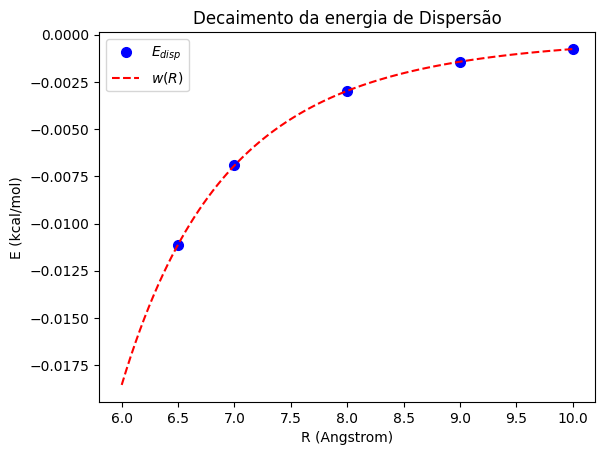

In [30]:
def func(x, n, Cdisp, y0):
  return -Cdisp*x**(-n)+y0

# Data
R = np.array([6.5, 7.0, 8.0, 9.0, 10.0])
E = np.array([-0.011117742475368106, -0.006916730080382734, -0.002980665769116391, -0.001434997254755321, -0.0007504074682623881])

# Fit the function
popt, pcov = curve_fit(func, R, E)

# Print the value of n
print(f"O expoente da lei de Potências é: {popt[0]}")
print(f"O coeficiente de dispersão é: {popt[1]}")
print(f"O valor de y0 é: {popt[2]}")

# Plot the data points
plt.plot(R, E, 'o', markersize=7, color='blue', label='$E_{disp}$')

# Plot the fitted function
x_fit = np.linspace(6, 10, 100)
y_fit = func(x_fit, popt[0], popt[1], popt[2])
plt.plot(x_fit, y_fit, '--', color='red', label='$w(R)$')

# Set the labels and title of the plot
plt.xlabel('R (Angstrom)')
plt.ylabel('E (kcal/mol)')
plt.title('Decaimento da energia de Dispersão')

# Show the plot
plt.legend()
plt.show()

*Questionamentos"

O valor ótimo do expoente $n$ obtido com seu ajuste concorda com o que você viu no *Dia 01* deste minicurso sobre as forças de van der Waals? O gráfico da dispersão se comporta como uma lei de potência do tipo $R^{-n}$ para grandes valores de $R$?

Agora vamos repetir a investigação incluindo todos os valores de $R$!

O expoente da lei de Potências é: 6.178521455819151
O coeficiente de dispersão é: 1274.913445989328
O valor de y0 é: 0.0006283974586291143


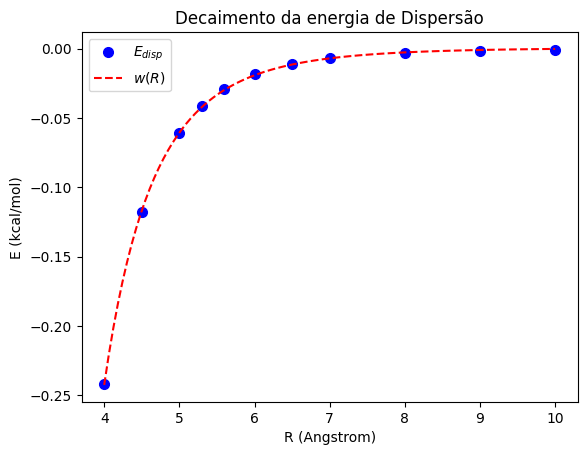

In [32]:
def func(x, n, Cdisp, y0):
  return -Cdisp*x**(-n)+y0

# Data
R = np.array([4.0, 4.5, 5.0, 5.3, 5.6, 6.0, 6.5, 7.0, 8.0, 9.0, 10.0])
E = np.array([-0.2420078169036565, -0.11798536020218389, -0.06058029731339575, -0.041646273830366544, -0.02916524265294848, -0.018647576969828772, -0.011117742475368106, -0.006916730080382734, -0.002980665769116391, -0.001434997254755321, -0.0007504074682623881])

# Fit the function
popt, pcov = curve_fit(func, R, E)

# Print the value of n
print(f"O expoente da lei de Potências é: {popt[0]}")
print(f"O coeficiente de dispersão é: {popt[1]}")
print(f"O valor de y0 é: {popt[2]}")

# Plot the data points
plt.plot(R, E, 'o', markersize=7, color='blue', label='$E_{disp}$')

# Plot the fitted function
x_fit = np.linspace(4, 10, 100)
y_fit = func(x_fit, popt[0], popt[1], popt[2])
plt.plot(x_fit, y_fit, '--', color='red', label='$w(R)$')

# Set the labels and title of the plot
plt.xlabel('R (Angstrom)')
plt.ylabel('E (kcal/mol)')
plt.title('Decaimento da energia de Dispersão')

# Show the plot
plt.legend()
plt.show()

Vimos que a Teoria de London para interações entre dois sistemas apolares é chamada costumeiramente de Forças de Dispersão de London ou interações *Dipolo-Induzio/Dipolo-Induzido*, dada por

$w(R)=-\frac{1}{(4\pi\epsilon_0)^2}\frac{3\alpha^2I}{4}\frac{1}{R^6}=-\frac{C_{London}}{R^6}$

ou fazendo $\alpha_0=\alpha/(4\pi\epsilon_0)$, podemos reescrever,

$w(R)=-\frac{1}{4\pi\epsilon_0}\frac{3\alpha_0^2I}{4}\frac{1}{R^6}=-\frac{C_{London}}{R^6}$

Vamos comparar a Teoria aproximada de London para interação de Dispersão com os cálculos SAPT0 realizados no programa Psi4. O átomo de Hélio tem polarizabilidade volumar de $\alpha_0=8.5892\times 10^{-31}m^3$. Podemos converter para polarizabilidade utilizando a relação $\alpha=4\pi\epsilon_0\alpha_0=9.5568\times 10^{-41}s^4\cdot A^2\cdot kg^{-1}$. A energia de ionização do Hélio é $I=3.939\times 10^{-18}J$. Com estes dados em mãos vamos comparar graficamente a energia de Dispersão SAPT0 com aquela derivada por Fritz London em 1930


306.6670873162179


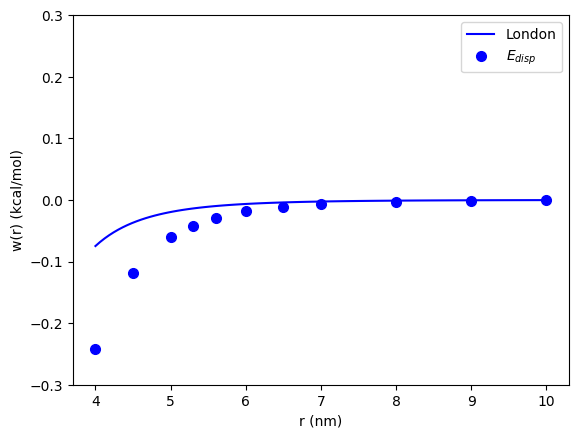

In [44]:
#Estes são parâmetros do Hélio
alfa = 9.5568*10**-11 #em s**4 A**2 kg**-1
eioniz = 3.939*10**-18 #em J
quatpieps = 1.113*10**-10 #em s**4 A**2 kg**-1 m**-3
NA = 6.022*10**23 #em mol**-1
Clondon = (NA/quatpieps**2)*((3*alfa**2*eioniz)/4)*(2.338*10**-4) #em kcal/mol * Angstrom**6

print(Clondon)
#Definindo o potencial
def wlondon(x):
  return -(Clondon/(x**6))


# Distâncias em Angstrom
x = np.linspace(4,10, 100)

# Create a figure
fig = plt.figure()

# Plot the curve for each value of n
y1 = wlondon(x)
plt.plot(x, y1, 'b', linestyle='-',label=str('London'))
plt.plot(R, E, 'o', markersize=7, color='red', label='$E_{disp}$')

plt.xlabel('r (nm)')
plt.ylabel('w(r) (kcal/mol)')
plt.ylim(-0.3,0.3)

# Add a legend
plt.legend()

# Show the plot
plt.show()